# **Imdb Most popular Films and series**

# Problem Statement
With the proliferation of streaming platforms and diverse content offerings, the demand for film and series recommendations has significantly increased. However, users often face challenges in discovering popular films and series that align with their preferences. Existing recommendation systems may not effectively utilize available data to predict user preferences or box office performance, leading to missed opportunities for content discovery and viewer engagement (Sharma et al., 2022).


# Objective

The objective of this project is to implement machine learning model (regression model and its derivative) that accurately predicts the ratings or box office performance of films and series based on various features, such as genre, release year, cast, and audience demographics. By leveraging the IMDb dataset from Kaggle, this model aims to provide insights into the factors influencing viewer preferences and help streaming platforms enhance their recommendation algorithms, ultimately improving user satisfaction and engagement with their content offerings.

# Data Collection

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mazenramadan/imdb-most-popular-films-and-series")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mazenramadan/imdb-most-popular-films-and-series/versions/3


In [ ]:
!kaggle datasets download -d mazenramadan/imdb-most-popular-films-and-series

Dataset URL: https://www.kaggle.com/datasets/mazenramadan/imdb-most-popular-films-and-series
License(s): CC0-1.0
imdb-most-popular-films-and-series.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import os

# List files in the dataset path
files = os.listdir(path)
print("Files in the dataset folder:", files)

Files in the dataset folder: ['imdb.csv']


In [ ]:
# Load the CSV file
csv_file = os.path.join(path, 'imdb.csv')
df = pd.read_csv(csv_file)

# Display the first few rows
df.head()

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90.0,Film,R,-,NaN,NaN,Severe,NaN,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120.0,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,NaN,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155.0,Film,PG-13,-,NaN,Moderate,NaN,Mild,Moderate


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         6178 non-null   object 
 1   Date         6178 non-null   int64  
 2   Rate         6178 non-null   object 
 3   Votes        6178 non-null   object 
 4   Genre        6178 non-null   object 
 5   Duration     5877 non-null   float64
 6   Type         6178 non-null   object 
 7   Certificate  5728 non-null   object 
 8   Episodes     6178 non-null   object 
 9   Nudity       4719 non-null   object 
 10  Violence     5504 non-null   object 
 11  Profanity    5520 non-null   object 
 12  Alcohol      5407 non-null   object 
 13  Frightening  5320 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 675.8+ KB


(6178, 14)

# Data Preprocessing

In [ ]:
# Check for null values in all columns
null_values_per_column = df.isnull().sum()
print("Number of missing values in each column:")
print(null_values_per_column)

Number of missing values in each column:
Name              0
Date              0
Rate              0
Votes             0
Genre             0
Duration        301
Type              0
Certificate     450
Episodes          0
Nudity         1459
Violence        674
Profanity       658
Alcohol         771
Frightening     858
dtype: int64


In [ ]:
df['Votes'] = df['Votes'].replace(",", "", regex=True)
df['Votes'] = pd.to_numeric(df['Votes'], errors = 'coerce')
df['Duration'] = pd.to_numeric(df['Duration'], errors = 'coerce')
df.fillna(0, inplace = True)


df['Votes'] = df['Votes'].astype('int')
df['Duration'] = df['Duration'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         6178 non-null   object
 1   Date         6178 non-null   int64 
 2   Rate         6178 non-null   object
 3   Votes        6178 non-null   int64 
 4   Genre        6178 non-null   object
 5   Duration     6178 non-null   int64 
 6   Type         6178 non-null   object
 7   Certificate  6178 non-null   object
 8   Episodes     6178 non-null   object
 9   Nudity       6178 non-null   object
 10  Violence     6178 non-null   object
 11  Profanity    6178 non-null   object
 12  Alcohol      6178 non-null   object
 13  Frightening  6178 non-null   object
dtypes: int64(3), object(11)
memory usage: 675.8+ KB


##Handle missing values

In [ ]:
df['Episodes'] = pd.to_numeric(df['Episodes'], errors = 'coerce')
df.fillna(0, inplace = True)
df['Episodes'] = df['Episodes'].astype('int')

In [ ]:
# Fill missing values in numerical columns with the median
numerical_cols = ['Duration']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [ ]:
# Fill missing values in categorical columns with the mode
categorical_cols = ['Certificate', 'Nudity', 'Violence', 'Profanity', 'Alcohol', 'Frightening']
for col in categorical_cols:
# Fill with mode and assign it back to the column
    df[col] = df[col].fillna(df[col].mode()[0])

# Check for null values in all columns after handling missing values
null_values_per_column_after = df.isnull().sum()

# Print the result
print("Number of missing values in each column after handling:")
print(null_values_per_column_after)

Number of missing values in each column after handling:
Name           0
Date           0
Rate           0
Votes          0
Genre          0
Duration       0
Type           0
Certificate    0
Episodes       0
Nudity         0
Violence       0
Profanity      0
Alcohol        0
Frightening    0
dtype: int64


In [ ]:
df.head(10)

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,107163,"Action, Adventure, Thriller",163,Film,PG-13,0,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,64375,"Crime, Drama, Thriller",90,Film,R,0,0,0,Severe,0,Moderate
2,The Many Saints of Newark,2021,6.4,27145,"Crime, Drama",120,Film,R,0,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,30443,"Action, Adventure, Sci-Fi",97,Film,PG-13,0,0,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,84636,"Action, Adventure, Drama",155,Film,PG-13,0,0,Moderate,0,Mild,Moderate
5,Ted Lasso,2021,8.8,117562,"Comedy, Drama, Sport",30,Series,TV-MA,23,Mild,0,Severe,Mild,0
6,Free Guy,2021,7.3,153835,"Action, Adventure, Comedy",115,Film,PG-13,0,Mild,Moderate,Moderate,0,Mild
7,House of the Dragon,2021,No Rate,0,"Action, Adventure, Drama",0,Series,0,10,No Rate,No Rate,No Rate,No Rate,No Rate
8,What If...?,2021,7.6,51959,"Animation, Action, Adventure",0,Series,TV-14,18,0,Moderate,Mild,Mild,Moderate
9,Sex Education,2021,8.3,220201,"Comedy, Drama",45,Series,TV-MA,25,Severe,Mild,Severe,Moderate,Mild


In [ ]:
df['Frightening'].unique()

array(['Moderate', 0, 'Mild', 'No Rate', 'Severe'], dtype=object)

In [ ]:
def replace_value(df):
    df = df.replace({'None':0,'Mild':1,'Moderate':2,'Severe':3,'No Rate':0,'-':0,'No Votes':0})
    return df

In [ ]:
df = df.apply(replace_value)

<ipython-input-106-6f7d5474fe95>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'None':0,'Mild':1,'Moderate':2,'Severe':3,'No Rate':0,'-':0,'No Votes':0})


## Drop Duplicates Data

In [ ]:
print('Total duplicates data {}'.format(df.duplicated(keep='first').sum()))
df = df.drop_duplicates(keep = 'first')

Total duplicates data 1150


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5028 entries, 0 to 5027
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         5028 non-null   object
 1   Date         5028 non-null   int64 
 2   Rate         5028 non-null   object
 3   Votes        5028 non-null   int64 
 4   Genre        5028 non-null   object
 5   Duration     5028 non-null   int64 
 6   Type         5028 non-null   object
 7   Certificate  5028 non-null   object
 8   Episodes     5028 non-null   int64 
 9   Nudity       5028 non-null   int64 
 10  Violence     5028 non-null   int64 
 11  Profanity    5028 non-null   int64 
 12  Alcohol      5028 non-null   int64 
 13  Frightening  5028 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 589.2+ KB


# EDA

## Outliers Detection

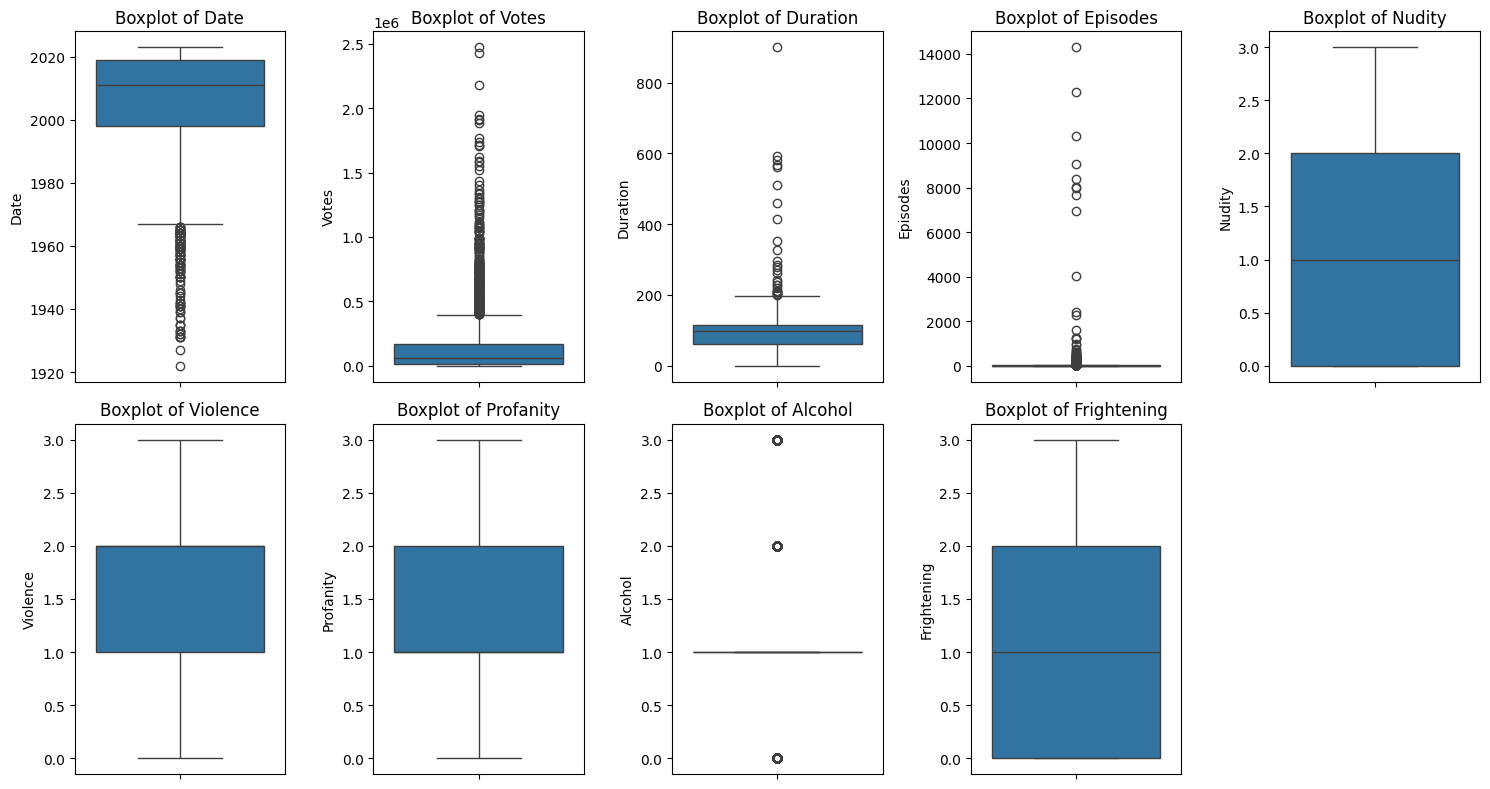

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Select all numerical columns from the dataframe
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Set up the figure size
plt.figure(figsize=(15, 8))

# Loop through each numerical column and create a box plot
for i, col in enumerate(numerical_cols):
    plt.subplot(2, len(numerical_cols)//2 + 1, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

## Handle Outliers

In [ ]:
# Calculate the IQR (Interquartile Range) for 'Votes', 'Duration'
Q1_votes = df['Votes'].quantile(0.25)
Q3_votes = df['Votes'].quantile(0.75)
IQR_votes = Q3_votes - Q1_votes

Q1_duration = df['Duration'].quantile(0.25)
Q3_duration = df['Duration'].quantile(0.75)
IQR_duration = Q3_duration - Q1_duration


# Define the upper and lower bounds for outliers in 'Votes', 'Duration'
lower_bound_votes = Q1_votes - 1.5 * IQR_votes
upper_bound_votes = Q3_votes + 1.5 * IQR_votes

lower_bound_duration = Q1_duration - 1.5 * IQR_duration
upper_bound_duration = Q3_duration + 1.5 * IQR_duration


# Filter rows where 'Votes', 'Duration' are considered outliers
votes_outliers = df[(df['Votes'] < lower_bound_votes) | (df['Votes'] > upper_bound_votes)]
duration_outliers = df[(df['Duration'] < lower_bound_duration) | (df['Duration'] > upper_bound_duration)]

# Print the number of outliers
print("Number of Votes Outliers:", len(votes_outliers))
print("Number of Duration Outliers:", len(duration_outliers))


Number of Votes Outliers: 384
Number of Duration Outliers: 27


In [ ]:
# Remove outliers from 'Votes', 'Duration' by filtering the dataframe
df_cleaned = df[
    (df['Votes'] >= lower_bound_votes) & (df['Votes'] <= upper_bound_votes) &
    (df['Duration'] >= lower_bound_duration) & (df['Duration'] <= upper_bound_duration) ]

# Print the shape of the cleaned dataframe to see how many rows remain
print("Shape of the dataframe after cleaning:", df_cleaned.shape)

Shape of the dataframe after cleaning: (4619, 14)


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4619 entries, 0 to 5027
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         4619 non-null   object
 1   Date         4619 non-null   int64 
 2   Rate         4619 non-null   object
 3   Votes        4619 non-null   int64 
 4   Genre        4619 non-null   object
 5   Duration     4619 non-null   int64 
 6   Type         4619 non-null   object
 7   Certificate  4619 non-null   object
 8   Episodes     4619 non-null   int64 
 9   Nudity       4619 non-null   int64 
 10  Violence     4619 non-null   int64 
 11  Profanity    4619 non-null   int64 
 12  Alcohol      4619 non-null   int64 
 13  Frightening  4619 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 541.3+ KB


## Visualization Distribtion

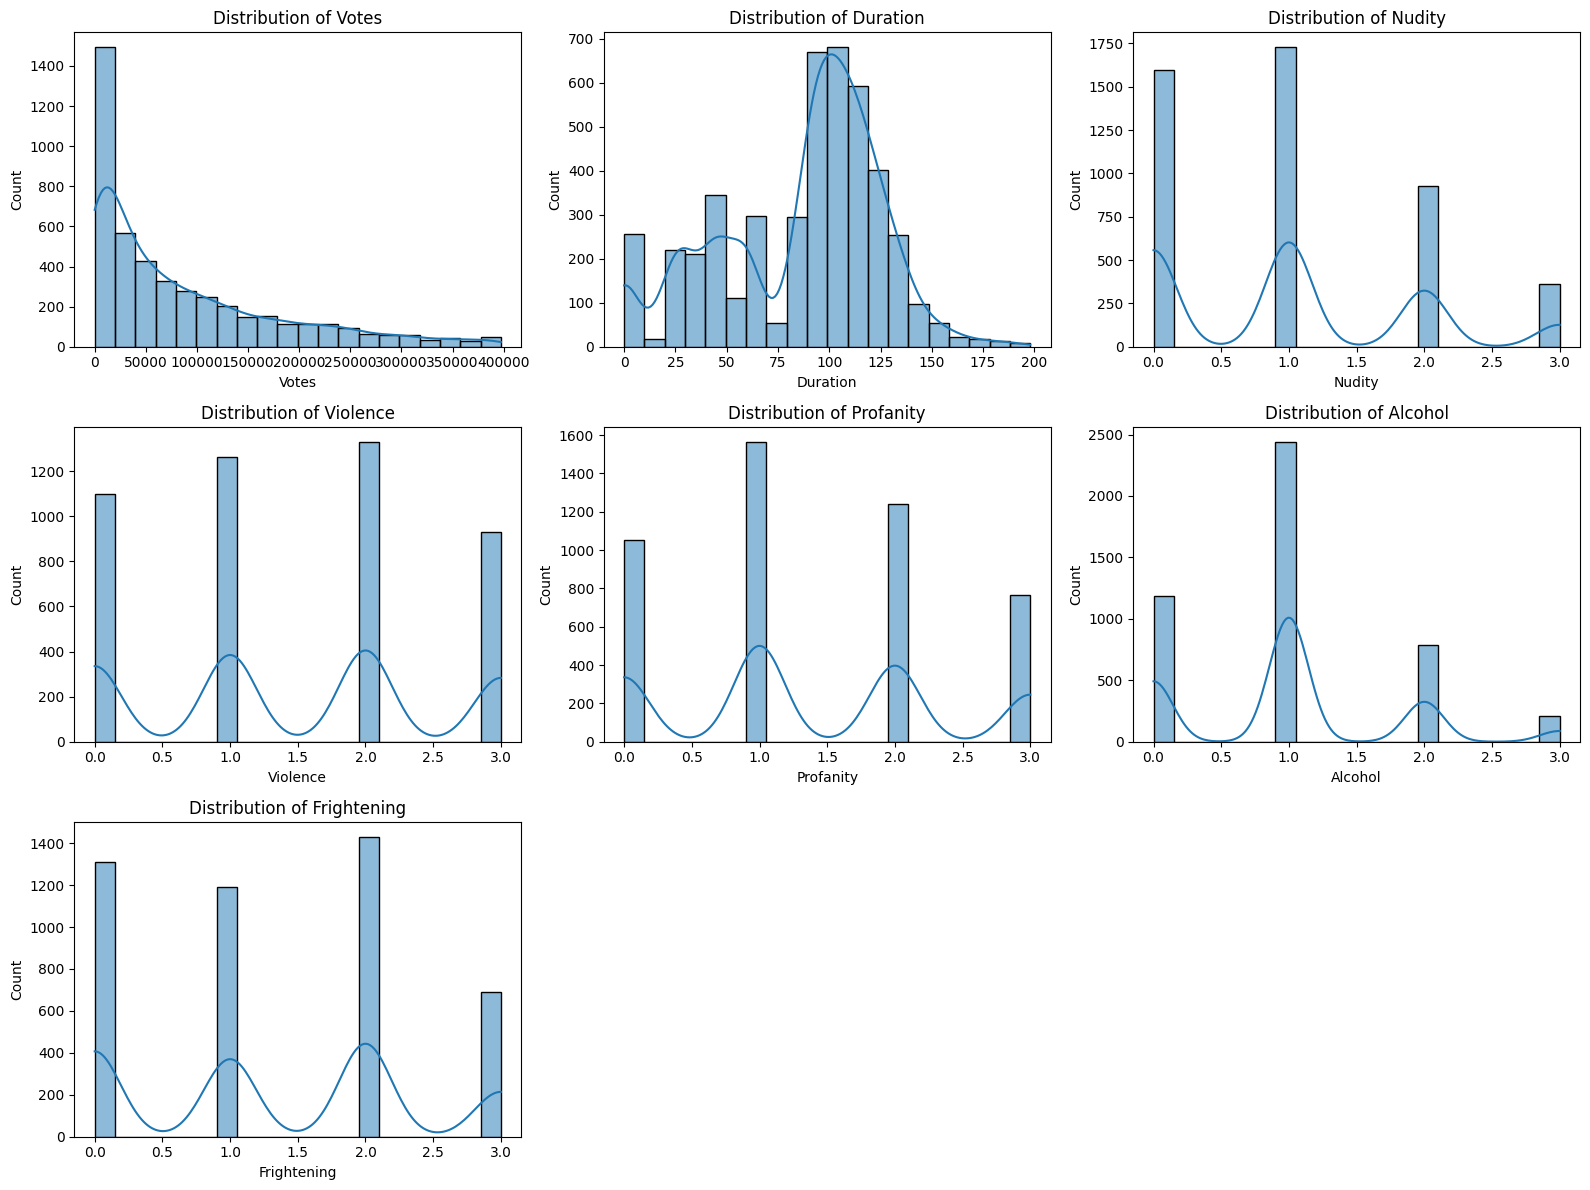

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns to plot the distribution
columns_to_plot = ['Votes', 'Duration', 'Nudity', 'Violence', 'Profanity', 'Alcohol', 'Frightening']

# Set up the plotting area with appropriate size
plt.figure(figsize=(16, 12))

# Loop through the columns and plot the distribution
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)  # Create a subplot (3x3 grid for 9 plots)

    # Plot distribution with histogram and KDE
    sns.histplot(df_cleaned[col], kde=True, bins=20)

    # Set the title for each plot
    plt.title(f'Distribution of {col}')

# Adjust layout to prevent overlapping plots
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4619 entries, 0 to 5027
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         4619 non-null   object
 1   Date         4619 non-null   int64 
 2   Rate         4619 non-null   object
 3   Votes        4619 non-null   int64 
 4   Genre        4619 non-null   object
 5   Duration     4619 non-null   int64 
 6   Type         4619 non-null   object
 7   Certificate  4619 non-null   object
 8   Episodes     4619 non-null   int64 
 9   Nudity       4619 non-null   int64 
 10  Violence     4619 non-null   int64 
 11  Profanity    4619 non-null   int64 
 12  Alcohol      4619 non-null   int64 
 13  Frightening  4619 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 541.3+ KB
None


# Correlation Map

In [ ]:
df2 = df_cleaned.copy()

In [ ]:
# Dropping unnecessary columns
df2.drop(['Name', 'Certificate', 'Type', 'Genre'], axis=1, inplace=True, errors='ignore')  # Use errors='ignore' to avoid KeyError

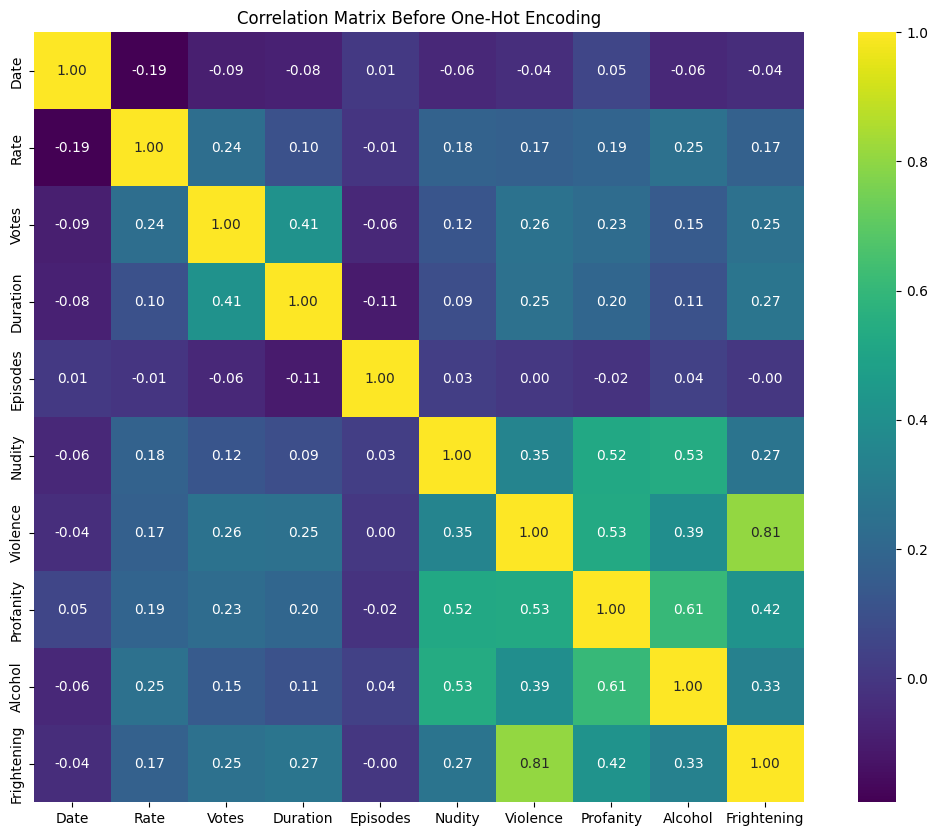

In [ ]:
# Select only numerical columns
numerical_df = df2.select_dtypes(include=[np.number])

# Plotting Correlation Matrix
plt.figure(figsize=(14, 10))
correlation_matrix = df2.corr()  # Calculate the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', square=True, cbar=True)
plt.title('Correlation Matrix Before One-Hot Encoding')
plt.show()

In [ ]:
df2.head()

,Date,Rate,Votes,Duration,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,2021,7.6,107163,163,0,1,2,1,1,2
1,2021,6.3,64375,90,0,0,0,3,0,2
2,2021,6.4,27145,120,0,2,3,3,2,2
3,2021,6.4,30443,97,0,0,2,2,1,2
4,2021,8.3,84636,155,0,0,2,0,1,2


# One hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

In [ ]:
df3 = df_cleaned.copy()
df3['Genre'] = df3['Genre'].str.replace(' ', '', regex=False)  # Use regex=False for safety
genre_cols = df3['Genre'].str.get_dummies(sep=',')

In [ ]:
genre_cols

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5024,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5025,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5026,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Combine genre columns with the original dataframe
df3 = pd.concat([df3, genre_cols], axis=1, join='inner')
df3 = df3.drop(columns='Genre', errors='ignore')
df3.head()

,Name,Date,Rate,Votes,Duration,Type,Certificate,Episodes,Nudity,Violence,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,No Time to Die,2021,7.6,107163,163,Film,PG-13,0,1,2,...,0,0,0,0,0,0,0,1,0,0
1,The Guilty,2021,6.3,64375,90,Film,R,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,The Many Saints of Newark,2021,6.4,27145,120,Film,R,0,2,3,...,0,0,0,0,0,0,0,0,0,0
3,Venom: Let There Be Carnage,2021,6.4,30443,97,Film,PG-13,0,0,2,...,0,0,0,1,0,0,0,0,0,0
4,Dune,2021,8.3,84636,155,Film,PG-13,0,0,2,...,0,0,0,0,0,0,0,0,0,0


# Label Encoding

In [ ]:
df3['Certificate'] = df3['Certificate'].astype('string')

In [ ]:
df3['Certificate'].unique()

<StringArray>
[    'PG-13',         'R',     'TV-MA',         '0',     'TV-14',     'TV-PG',
        'PG',      'TV-G',  '(Banned)', 'Not Rated',         'E',     'NC-17',
  'TV-Y7-FV',     'TV-Y7',         'G',      'TV-Y',  'Approved',        'GP',
    'Passed',   'Unrated',         'M',         'X',      'M/PG']
Length: 23, dtype: string

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Certificate' column
df3['Certificate_encoded'] = label_encoder.fit_transform(df3['Certificate'])

# Check the unique values and corresponding labels
certificate_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping for 'Certificate':", certificate_mapping)

# Drop the original 'Certificate' column
df3 = df3.drop(columns='Certificate', errors='ignore')

# Apply label encoding to the 'Type' column
df3['Type_encoded'] = label_encoder.fit_transform(df3['Type'])

# Check the unique values and corresponding labels for 'Type'
type_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping for 'Type':", type_mapping)

# Drop the original 'Type' column
df3 = df3.drop(columns='Type', errors='ignore')

Label Encoding Mapping for 'Certificate': {'(Banned)': 0, '0': 1, 'Approved': 2, 'E': 3, 'G': 4, 'GP': 5, 'M': 6, 'M/PG': 7, 'NC-17': 8, 'Not Rated': 9, 'PG': 10, 'PG-13': 11, 'Passed': 12, 'R': 13, 'TV-14': 14, 'TV-G': 15, 'TV-MA': 16, 'TV-PG': 17, 'TV-Y': 18, 'TV-Y7': 19, 'TV-Y7-FV': 20, 'Unrated': 21, 'X': 22}
Label Encoding Mapping for 'Type': {'Film': 0, 'Series': 1}


In [ ]:
df3.head()

,Name,Date,Rate,Votes,Duration,Episodes,Nudity,Violence,Profanity,Alcohol,...,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,Certificate_encoded,Type_encoded
0,No Time to Die,2021,7.6,107163,163,0,1,2,1,1,...,0,0,0,0,0,1,0,0,11,0
1,The Guilty,2021,6.3,64375,90,0,0,0,3,0,...,0,0,0,0,0,1,0,0,13,0
2,The Many Saints of Newark,2021,6.4,27145,120,0,2,3,3,2,...,0,0,0,0,0,0,0,0,13,0
3,Venom: Let There Be Carnage,2021,6.4,30443,97,0,0,2,2,1,...,0,1,0,0,0,0,0,0,11,0
4,Dune,2021,8.3,84636,155,0,0,2,0,1,...,0,0,0,0,0,0,0,0,11,0


In [ ]:
#Drop unnecessary column
column_to_drop = ['Name']

df3 = df3.drop(columns=column_to_drop, errors='ignore')

# Display the updated DataFrame to verify the column is removed
df3.head()

,Date,Rate,Votes,Duration,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening,...,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,Certificate_encoded,Type_encoded
0,2021,7.6,107163,163,0,1,2,1,1,2,...,0,0,0,0,0,1,0,0,11,0
1,2021,6.3,64375,90,0,0,0,3,0,2,...,0,0,0,0,0,1,0,0,13,0
2,2021,6.4,27145,120,0,2,3,3,2,2,...,0,0,0,0,0,0,0,0,13,0
3,2021,6.4,30443,97,0,0,2,2,1,2,...,0,1,0,0,0,0,0,0,11,0
4,2021,8.3,84636,155,0,0,2,0,1,2,...,0,0,0,0,0,0,0,0,11,0


In [ ]:
check_missing = df3.isnull().sum()
print(check_missing)

Date                   0
Rate                   0
Votes                  0
Duration               0
Episodes               0
Nudity                 0
Violence               0
Profanity              0
Alcohol                0
Frightening            0
Action                 0
Adventure              0
Animation              0
Biography              0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Family                 0
Fantasy                0
Film-Noir              0
Game-Show              0
History                0
Horror                 0
Music                  0
Musical                0
Mystery                0
News                   0
Reality-TV             0
Romance                0
Sci-Fi                 0
Short                  0
Sport                  0
Talk-Show              0
Thriller               0
War                    0
Western                0
Certificate_encoded    0
Type_encoded           0
dtype: int64


# Model Implemmentation

# Linear Regression



In [ ]:
df_reg = df3.copy()

In [ ]:
print(df_reg.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4619 entries, 0 to 5027
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 4619 non-null   int64 
 1   Rate                 4619 non-null   object
 2   Votes                4619 non-null   int64 
 3   Duration             4619 non-null   int64 
 4   Episodes             4619 non-null   int64 
 5   Nudity               4619 non-null   int64 
 6   Violence             4619 non-null   int64 
 7   Profanity            4619 non-null   int64 
 8   Alcohol              4619 non-null   int64 
 9   Frightening          4619 non-null   int64 
 10  Action               4619 non-null   int64 
 11  Adventure            4619 non-null   int64 
 12  Animation            4619 non-null   int64 
 13  Biography            4619 non-null   int64 
 14  Comedy               4619 non-null   int64 
 15  Crime                4619 non-null   int64 
 16  Documentary

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Predict 'Rates' as target column
x = df_reg.drop('Rate', axis=1)  # Features
y = df_reg['Rate']  # Target variable

## Split train and test data

In [ ]:
#Split train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33, random_state = 0)

In [ ]:
# Check the number of rows in the train and test sets
print(f"Training set size (x_train): {x_train.shape[0]} rows")
print(f"Test set size (x_test): {x_test.shape[0]} rows")
print(f"Training set size (y_train): {y_train.shape[0]} rows")
print(f"Test set size (y_test): {y_test.shape[0]} rows")

Training set size (x_train): 3094 rows
Test set size (x_test): 1525 rows
Training set size (y_train): 3094 rows
Test set size (y_test): 1525 rows


## Feature Scaling

In [ ]:
# Scaling Standard dization mean = 0 and std = 1.
from sklearn.preprocessing import StandardScaler
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the model
regmodel = LinearRegression()
regmodel.fit(x_train, y_train)

# Make predictions
y_pred_linear = regmodel.predict(x_test)

In [ ]:
import pandas as pd

# Ensure y_test is numeric
y_test = pd.to_numeric(y_test, errors='coerce')

# Ensure y_pred is also numeric
y_pred_linear = np.array(y_pred_linear)

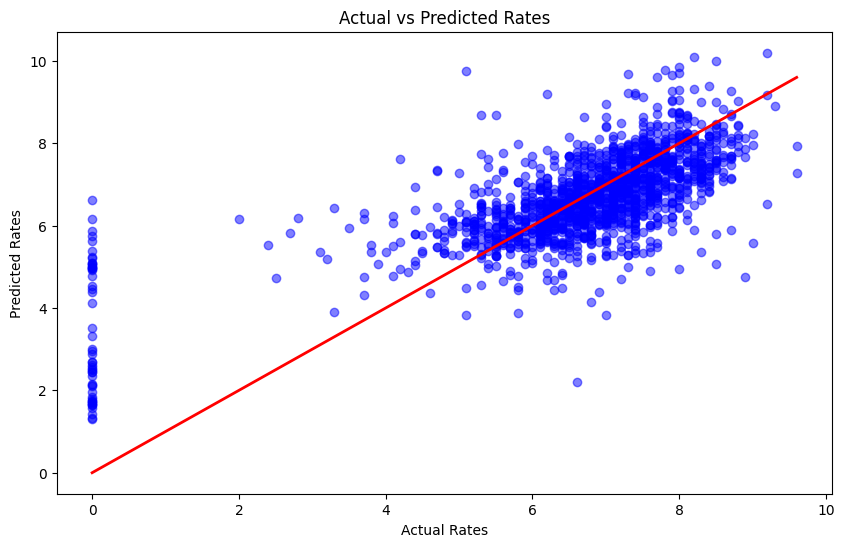

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))

# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)

# Adding labels and title
plt.xlabel('Actual Rates')
plt.ylabel('Predicted Rates')
plt.title('Actual vs Predicted Rates')

# Display the plot
plt.show()

In [ ]:

# Calculating and printing Linear Mean Squared Error
linear_mse = metrics.mean_squared_error(y_test, y_pred_linear)
print(f'Linear Mean Squared Error: {linear_mse}')

# Calculating and printing Linear R² Score
linear_r2 = metrics.r2_score(y_test, y_pred_linear)
print(f'Linear R² Score: {linear_r2}')

Linear Mean Squared Error: 1.303217457009165
Linear R² Score: 0.5092831498190629


# Lasso Regression

In [ ]:
df5 = df3.copy()

In [ ]:
# Predict 'Rates' as target column
x = df5.drop('Rate', axis=1)  # Features
y = df5['Rate']  # Target variable

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
# Create a Lasso regression model
lasso_model = Lasso(alpha=0.1)

# Fit the model
lasso_model.fit(x_train, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(x_test)

In [ ]:
# Calculate Mean Squared Error and R² score
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 1.5392892634894406
R² Score: 0.4203920651658669


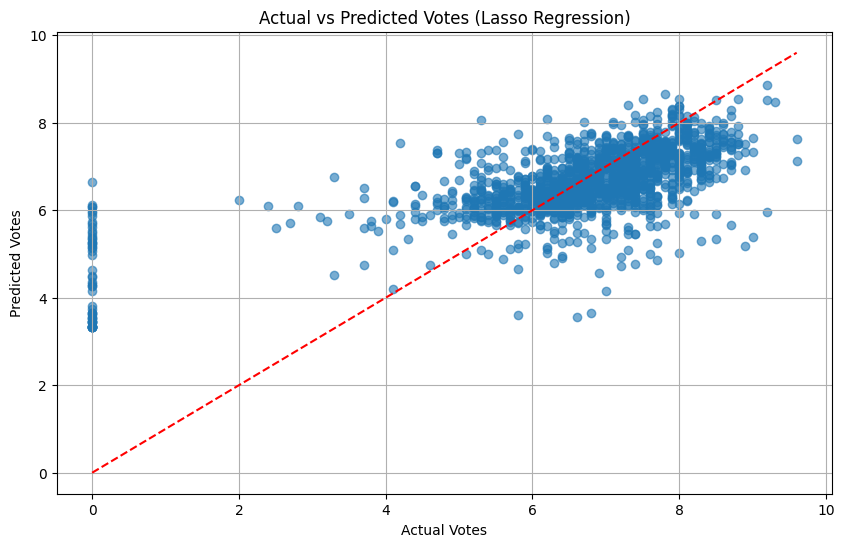

In [ ]:
# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.title('Actual vs Predicted Votes (Lasso Regression)')
plt.xlabel('Actual Votes')
plt.ylabel('Predicted Votes')
plt.grid()
plt.show()

## Hyperparameter Fine Tunning

In [ ]:
# Model Implementation with Hyperparameter Tuning

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Make a copy of the original dataframe to avoid modifying it
df_par = df3.copy()

# Predict 'Rates' as target column
x = df_par.drop('Rate', axis=1)  # Features
y = df_par['Rate']  # Target variable

# Split train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

# Scaling: Standardization (mean = 0 and std = 1)
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)

# Function to evaluate models
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    return mse, r2

# Define hyperparameters for Lasso, Ridge, and Elastic Net
lasso_params = {'alpha': np.logspace(-4, 1, 10)}  # Alpha values for Lasso

# Lasso Regression with Grid Search
lasso_grid = GridSearchCV(Lasso(), lasso_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(x_train, y_train)
best_lasso = lasso_grid.best_estimator_
lasso_mse, lasso_r2 = evaluate_model(best_lasso, x_train, y_train, x_test, y_test)

print('Best Lasso Parameters:', lasso_grid.best_params_)
print('Lasso Regression MSE:', lasso_mse)
print('Lasso Regression R²:', lasso_r2)

Best Lasso Parameters: {'alpha': 0.004641588833612782}
Lasso Regression MSE: 1.303784857048686
Lasso Regression R²: 0.509069499550116


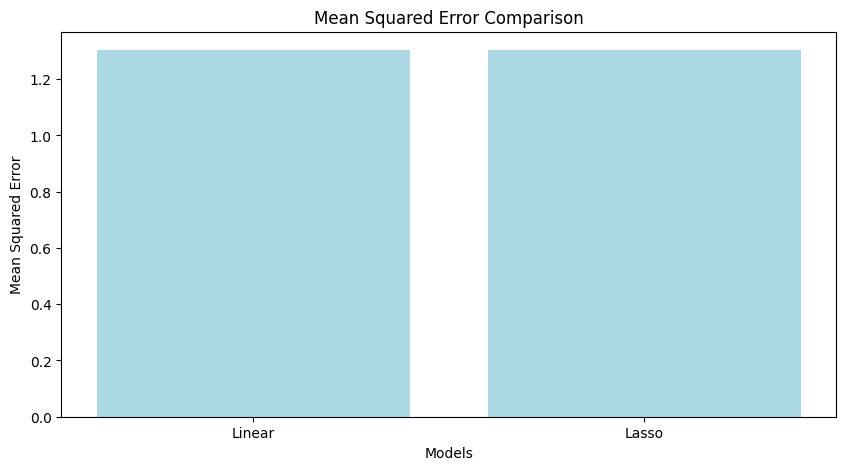

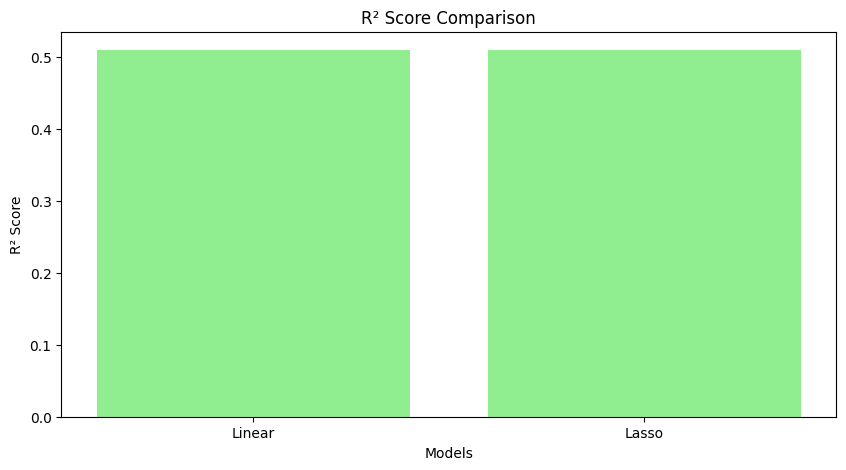

In [ ]:
# Visualizing the results
models = ['Linear', 'Lasso']
mses = [linear_mse, lasso_mse]
r2_scores = [linear_r2, lasso_r2]

# Plot MSE
plt.figure(figsize=(10, 5))
plt.bar(models, mses, color='lightblue')
plt.title('Mean Squared Error Comparison')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.show()

# Plot R² Scores
plt.figure(figsize=(10, 5))
plt.bar(models, r2_scores, color='lightgreen')
plt.title('R² Score Comparison')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.show()

## Learning Curve

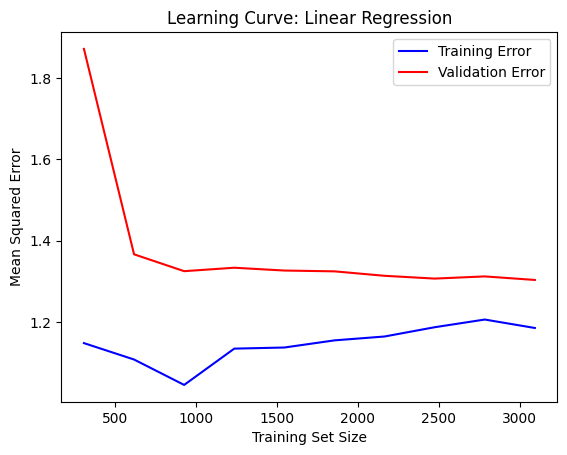

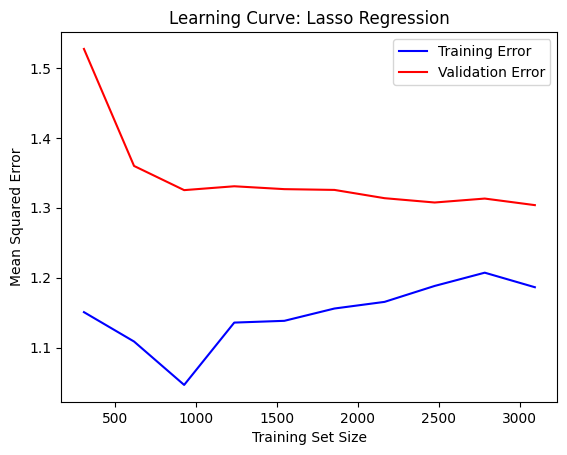

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate and plot learning curves
def plot_learning_curve(model, x_train, y_train, x_test, y_test, title):
    train_errors = []
    val_errors = []
    train_sizes = np.linspace(0.1, 1.0, 10)

    for train_size in train_sizes:
        # Use a subset of the training data
        subset_size = int(len(x_train) * train_size)
        x_train_subset = x_train[:subset_size]
        y_train_subset = y_train[:subset_size]

        # Train the model on the subset
        model.fit(x_train_subset, y_train_subset)

        # Predict on the training subset and the test set
        y_train_predict = model.predict(x_train_subset)
        y_test_predict = model.predict(x_test)

        # Calculate training and validation errors (MSE)
        train_errors.append(metrics.mean_squared_error(y_train_subset, y_train_predict))
        val_errors.append(metrics.mean_squared_error(y_test, y_test_predict))

    # Plotting the learning curve
    plt.plot(train_sizes * len(x_train), train_errors, 'b-', label="Training Error")
    plt.plot(train_sizes * len(x_train), val_errors, 'r-', label="Validation Error")
    plt.title(f'Learning Curve: {title}')
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

# Make a copy of the original dataframe to avoid modifying it
df_par1 = df3.copy()

# Predict 'Rates' as target column
x = df_par1.drop('Rate', axis=1)  # Features
y = df_par1['Rate']  # Target variable

# Split train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

# Scaling: Standardization (mean = 0 and std = 1)
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)

# Linear Regression Model
linear_model = LinearRegression()

# Lasso Regression Model with Hyperparameter Tuning
lasso_params = {'alpha': np.logspace(-4, 1, 10)}  # Alpha values for Lasso
lasso_grid = GridSearchCV(Lasso(), lasso_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(x_train, y_train)
best_lasso = lasso_grid.best_estimator_

# Plot learning curve for Linear Regression
plot_learning_curve(linear_model, x_train, y_train, x_test, y_test, title="Linear Regression")

# Plot learning curve for Lasso Regression
plot_learning_curve(best_lasso, x_train, y_train, x_test, y_test, title="Lasso Regression")

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Make a copy of the original dataframe
df_rf = df3.copy()

# Predict 'Rates' as target column
x = df_rf.drop('Rate', axis=1)  # Features
y = df_rf['Rate']  # Target variable

# Split train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

# Scaling: Standardization
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)

## Best Parameter

In [ ]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # More trees
    'max_features': ['log2', 'sqrt'],  # Experiment with different features
    'max_depth': [None, 20, 30, 40],  # Allow for deeper trees
    'min_samples_split': [2, 5, 10],  # Try increasing the split criteria
    'min_samples_leaf': [1, 2, 4]  # Explore larger leaf sizes
}

# Perform Grid Search with cross-validation
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
rf_grid.fit(x_train, y_train)

# Best estimator
best_rf_model = rf_grid.best_estimator_
print("Best Parameters:", rf_grid.best_params_)

# Predict using the best Random Forest model
y_rf_pred = best_rf_model.predict(x_test)

# Evaluate Random Forest
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f'Random Forest Regression MSE: {rf_mse}')
print(f'Random Forest Regression R²: {rf_r2}')

Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Random Forest Regression MSE: 0.5320879885036647
Random Forest Regression R²: 0.7996462214856651


In [ ]:
# Convert y_test to float64 explicitly
y_test = y_test.astype(float)
y_rf_pred = np.array(y_rf_pred)

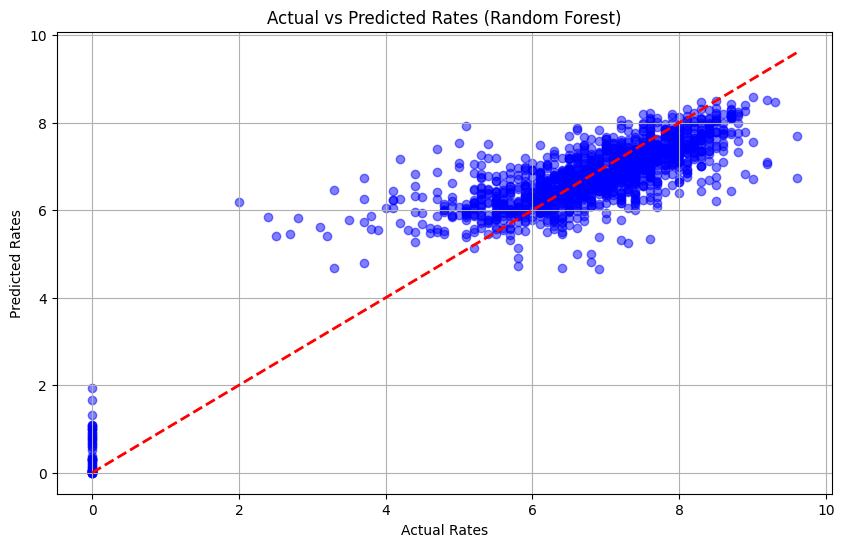

In [ ]:
# Convert y_test and y_rf_pred to numpy arrays and ensure they are floats y_test = np.array(y_test)
y_rf_pred = np.array(y_rf_pred)

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))

# Scatter plot for Actual vs Predicted
plt.scatter(y_test, y_rf_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Plot a diagonal line for reference

# Adding labels and title
plt.xlabel('Actual Rates')
plt.ylabel('Predicted Rates')
plt.title('Actual vs Predicted Rates (Random Forest)')
plt.grid(True)

# Show the plot
plt.show()